In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lib.fit_model_on_multiple import fit_lr, predict_lr, fit_rf, plot_md_vs_rmsd, predict_rf
from pathlib import Path
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path
from scipy.stats import linregress, pearsonr
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'

In [3]:
proteins = [
  'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
  'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]

In [4]:
da = DihedralAdherence(
    'T1053-D1', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
    weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda'
)
da.load_results_da()
da.filter_nas(.8)

Initializing T1053-D1 ...
casp_da/T1053-D1_win4-5-6-7
Results already exist
Casp ID: T1053-D1 	PDB: 7m7a
Structure exists: 'pdb/pdb7m7a.ent' 
UniProt ID: Q5ZRA8


Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|   382 |        344 | FSKDDSS    |   236.966 |  14.4173  |   222.549 |
|   340 |        302 | FYMGCEN    |   234.434 |  19.5879  |   214.846 |
|   284 |        246 | MTLNYTS    |   202.087 |  25.5289  |   176.558 |
|   289 |        251 | TSLDETD    |   184.526 |  12.5774  |   171.948 |
|   352 |        314 | PLPATNS    |   175.189 |   8.23613 |   166.953 |
|   283 |        245 | EMTLNYT    |   178.171 |  13.3042  |   164.867 |
|   162 |        154 | FDMFFYW    |   175.171 |  14.0375  |   161.133 |
|   351 |        313 | VPLPATN    |   176.256 |  16.1616  |   160.095 |
|   103 |         95 | KGFNFHK    |   162.301 |  13.0413  |   149.26  |
|   194 |        175 | WEGFPNV    |   174.153 |  28.7987  |   145.355 |


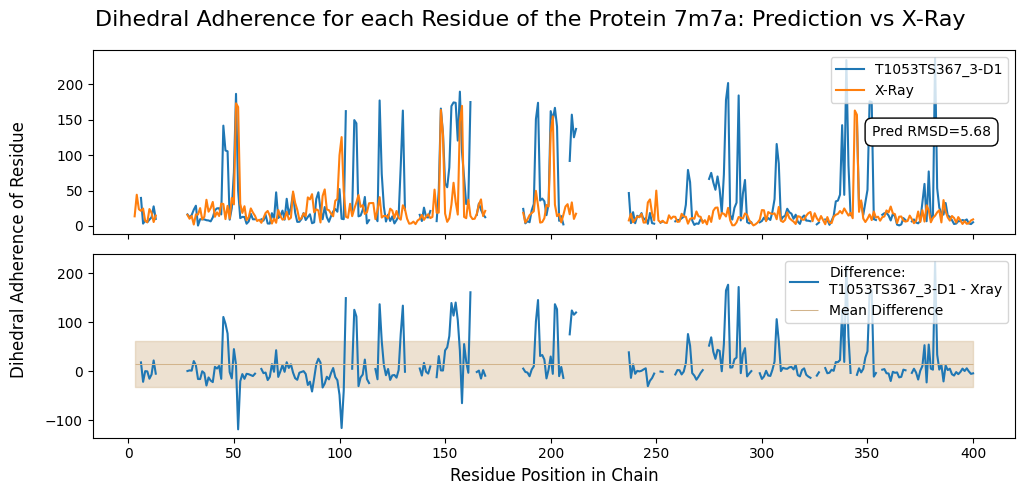

In [27]:
df = da.plot_res_vs_da('T1053TS367_3-D1')

In [30]:
df.sort_values('da_pred', ascending=False).head(10)

,pos,seq_ctxt,res,phi,psi,protein_id,da_pred,n_samples,n_samples_list,da_no_scale,conf,da_na,pos_xray,da_xray,da_diff
379,382,FSKDDSS,D,80.335563,-22.891337,T1053TS367_3-D1,236.965904,1849.0,"[1801, 48, 0, 0]",236.965904,85.31,False,344.0,14.417318,222.548586
337,340,FYMGCEN,G,-82.499254,-34.955828,T1053TS367_3-D1,234.434054,85.0,"[85, 0, 0, 0]",234.434054,85.25,False,302.0,19.587922,214.846132
281,284,MTLNYTS,N,-134.838446,127.280764,T1053TS367_3-D1,202.087212,2222.0,"[2050, 151, 21, 0]",202.087212,95.31,False,246.0,25.528945,176.558267
154,157,AGDIDFD,I,40.361739,-107.688167,T1053TS367_3-D1,189.885198,1635.0,"[1541, 84, 10, 0]",189.885198,95.88,False,149.0,147.869001,42.016197
48,51,PKNHYPE,H,-125.073234,-38.724160,T1053TS367_3-D1,186.761510,190.0,"[186, 4, 0, 0]",186.761510,88.06,False,43.0,173.334576,13.426934
286,289,TSLDETD,D,79.983357,95.366741,T1053TS367_3-D1,184.525656,2617.0,"[2468, 149, 0, 0]",184.525656,95.25,False,251.0,12.577401,171.948255
280,283,EMTLNYT,L,-67.995917,134.940665,T1053TS367_3-D1,178.170743,1021.0,"[1005, 16, 0, 0]",178.170743,96.75,False,245.0,13.304185,164.866558
116,119,KEQVIPS,V,-65.590383,176.861138,T1053TS367_3-D1,177.450009,1177.0,"[1066, 111, 0, 0]",177.450009,95.62,False,111.0,40.663704,136.786305
348,351,VPLPATN,P,-50.720490,-35.279525,T1053TS367_3-D1,176.256237,3782.0,"[3717, 65, 0, 0]",176.256237,88.50,False,313.0,16.161587,160.094650
349,352,PLPATNS,A,-65.034556,-39.150843,T1053TS367_3-D1,175.188792,1306.0,"[1296, 10, 0, 0]",175.188792,89.62,False,314.0,8.236127,166.952665


In [36]:
da.xray_phi_psi[da.xray_phi_psi.seq_ctxt == 'TSLDETD']

,pos,seq_ctxt,res,phi,psi,protein_id,da,n_samples,n_samples_list,da_no_scale
231,251,TSLDETD,D,-57.664262,-37.526915,7m7a,12.577401,2617.0,"[2468, 149, 0, 0]",12.577401


               phi          psi  weight      winsize
count  2617.000000  2617.000000  2617.0  2617.000000
mean    -85.910164    10.008254     1.0     4.056935
std      34.056367   106.902610     0.0     0.231763
min    -177.900000  -179.800000     1.0     4.000000
25%     -98.700000   -46.600000     1.0     4.000000
50%     -78.300000   -24.200000     1.0     4.000000
75%     -63.500000   116.500000     1.0     4.000000
max     173.000000   180.000000     1.0     5.000000
Residue D of Window TSLDETD centered at 251 of TSLDETD
	Win 4: LDET - 2468 samples
	Win 5: SLDET - 149 samples
	Win 6: SLDETD - 0 samples
	Win 7: TSLDETD - 0 samples
Ideal:	 (-59.77, -25.13)
X-ray[251]:	 (-57.66, -37.53), DA=12.58
TS367_3-D1[289]:	 (79.98, 95.37), DA=184.53
AlphaFold[289]:	 (-61.02, -27.01), DA=2.26
Other Predictions DA:
                 0
count  462.000000
mean   145.346926
std     57.361093
min      0.423004
25%    143.906512
50%    166.228060
75%    175.334252
max    238.729885


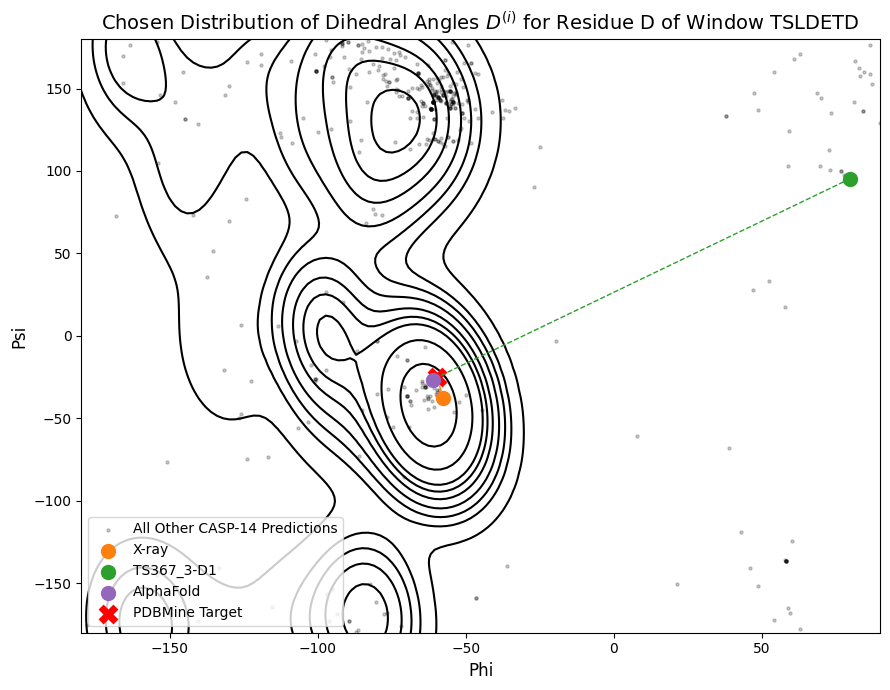

In [35]:
# da.plot_da_for_seq('FSKDDSS', pred_id='T1053TS367_3-D1')
# da.plot_da_for_seq('MTLNYTS', pred_id='T1053TS367_3-D1', fn='da_for_seq.pdf', axlims=((-160,130),(-90,180)));
da.plot_da_for_seq('TSLDETD', pred_id='T1053TS367_3-D1', fn='da_for_seq.pdf', axlims=((-180,90),(-180,180)));

In [43]:
da.grouped_preds.sort_values('GDT_TS')

,protein_id,da,da_na,Model,GDT_TS,log_da,target
220,T1053TS242_5-D1,133.474967,0.137845,T1053TS242_5-D1,3.94,2.125400,T1053-D1
216,T1053TS242_1-D1,108.220167,0.137845,T1053TS242_1-D1,5.52,2.034308,T1053-D1
85,T1053TS063_3-D1,111.206903,0.137845,T1053TS063_3-D1,5.52,2.046132,T1053-D1
381,T1053TS369_1-D1,112.710246,0.152882,T1053TS369_1-D1,6.09,2.051963,T1053-D1
217,T1053TS242_2-D1,104.289972,0.137845,T1053TS242_2-D1,6.09,2.018243,T1053-D1
...,...,...,...,...,...,...,...
428,T1053TS427_4-D1,7.171909,0.137845,T1053TS427_4-D1,96.49,0.855635,T1053-D1
429,T1053TS427_5-D1,7.329506,0.137845,T1053TS427_5-D1,96.49,0.865075,T1053-D1
427,T1053TS427_3-D1,7.476573,0.137845,T1053TS427_3-D1,96.78,0.873703,T1053-D1
425,T1053TS427_1-D1,7.342487,0.137845,T1053TS427_1-D1,97.06,0.865843,T1053-D1


/home/musa/protein-dihedral-visualization/lib/plotting.py:306: RuntimeWarning: Mean of empty slice
  X = np.where(np.isnan(X), np.nanmean(X,axis=0), X)


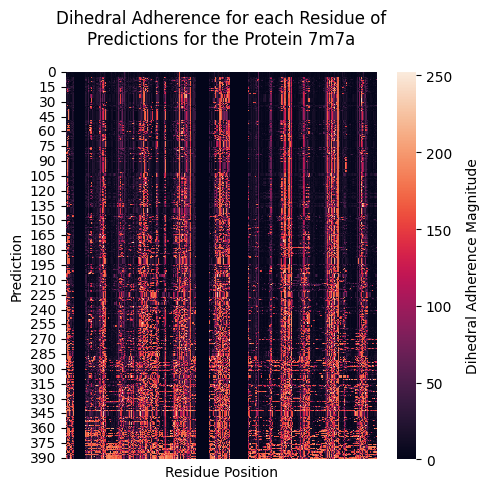

In [40]:
da.plot_heatmap(fillna=True, fn='heatmap.pdf')

Initializing T1053-D1 ...
casp_da/T1053-D1_win4-5-6-7
Results already exist
Casp ID: T1053-D1 	PDB: 7m7a
Structure exists: 'pdb/pdb7m7a.ent' 
UniProt ID: Q5ZRA8
Slope: -101.78625303955717, Intercept: 209.99278393745496 R-squared: 0.7238642721751419


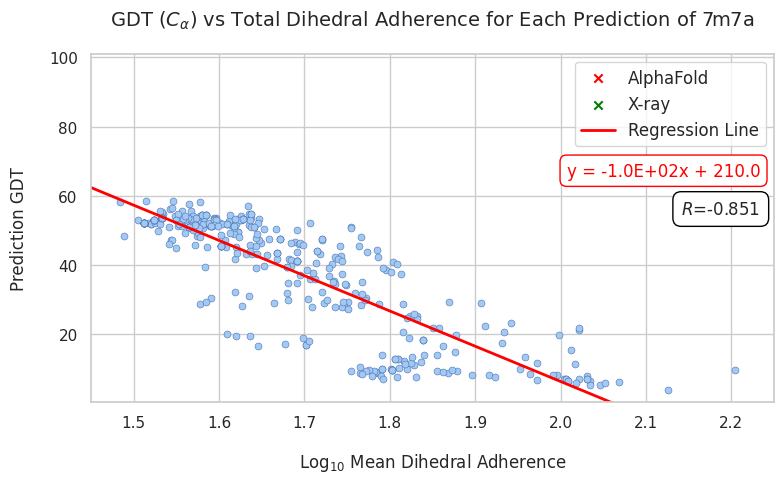

Initializing T1030-D1 ...
casp_da/T1030-D1_win4-5-6-7
Results already exist
Casp ID: T1030-D1 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
UniProt ID: Q8DWZ6
Slope: -71.93519666113974, Intercept: 145.89607412500408 R-squared: 0.6981203010805663


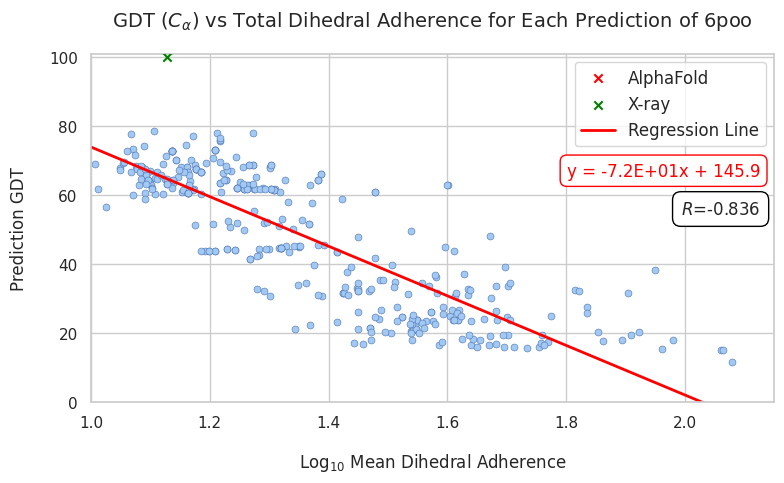

In [193]:
da = DihedralAdherence(
    'T1053-D1', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
    weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda'
)
da.load_results_da()
da.grouped_preds = da.grouped_preds[~da.grouped_preds.Model.str.contains('427')]
da.filter_nas(.8)
da.plot_da_vs_gdt_simple(axlims=((1.45, 2.25), (0.5, 101)), fn='gdt_vs_da-T1053.pdf')

da = DihedralAdherence(
    'T1030-D1', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
    weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda'
)
da.load_results_da()
da.grouped_preds = da.grouped_preds[~da.grouped_preds.Model.str.contains('427')]
da.filter_nas(.8)
da.plot_da_vs_gdt_simple(axlims=((1, 2.15), (0, 101)), fn='gdt_vs_da-T1030.pdf')

In [190]:
proteins_to_use = ['T1024',
 'T1030',
 'T1024-D1',
 'T1053-D1',
 'T1027-D1',
 'T1029-D1',
 'T1030-D1',
 'T1053-D2',
 'T1057-D1',
 'T1058-D1',
 'T1058-D2'
]

In [191]:
preds = []
rsquareds = []
pearsonrs = []
n_preds = []
for protein in proteins_to_use:
    da = DihedralAdherence(
        protein, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
        weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda'
    )
    da.load_results_da()
    da.filter_nas(.8)
    # af_da = da.grouped_preds.loc[da.grouped_preds.protein_id == da.alphafold_id, 'da'].values[0]
    # da.grouped_preds['da'] = da.grouped_preds['da'] / af_da
    # if not da.alphafold_id in da.protein_ids:
        # continue
    # if da.af_phi_psi is None:
        # continue
    # af_gdt = da.grouped_preds.loc[da.grouped_preds.protein_id == da.alphafold_id, 'GDT_TS'].values[0]
    # af_ave_conf = da.af_phi_psi.conf.mean()
    # da.grouped_preds['da'] = da.grouped_preds['da'] * (af_ave_conf / 100)
    da.grouped_preds['da'] = -da.grouped_preds['da']
    preds.append(da.grouped_preds)
    rsquared, corr = da.test_correlation()
    rsquareds.append(rsquared)
    pearsonrs.append(corr)
    n_preds.append(len(da.grouped_preds))

preds = pd.concat(preds)

Initializing T1024 ...
casp_da/T1024_win4-5-6-7
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
UniProt ID: Q48658
LinRegr - Slope: -60.412255252826206, Intercept: 130.83913457617282 R-squared: 0.5458478512634988 p-value: 1.8476286322637705e-67
Pearson Correlation: -0.7388151671856084, p-value: 1.847628632264172e-67
Initializing T1030 ...
casp_da/T1030_win4-5-6-7
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
UniProt ID: Q8DWZ6
LinRegr - Slope: -65.01709218965762, Intercept: 128.96223422564475 R-squared: 0.66217298139081 p-value: 1.6735776612483594e-88
Pearson Correlation: -0.81374011907415, p-value: 1.6735776612467853e-88
Initializing T1024-D1 ...
casp_da/T1024-D1_win4-5-6-7
Results already exist
Casp ID: T1024-D1 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
UniProt ID: Q48658
LinRegr - Slope: -72.61077616366498, Intercept: 167.19844773747593 R-squared: 0.6053020457893689 p-value: 5.591159694691757e-84
Pears

In [188]:
results = pd.DataFrame({
    'protein': proteins_to_use,
    'rsquared': rsquareds,
    'pearsonr': pearsonrs,
    'n_preds': n_preds
})
results.loc[len(results)] = ['Mean', results.rsquared.mean(), results.pearsonr.mean(), results.n_preds.mean()]
results.to_markdown('thisresult.md',index=False)

In [189]:
results

,protein,rsquared,pearsonr,n_preds
0,T1053-D1,0.744211,-0.862677,392.0
1,T1030-D1,0.710071,-0.842657,371.0
2,Mean,0.727141,-0.852667,381.5


In [6]:
preds_og = preds.copy()

In [30]:
# preds = preds[preds['target'].isin(['T1024', 'T1096', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1'])]
preds = preds[preds['target'].isin(['T1030-D2', 'T1024-D1', 'T1053-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2'])] # good (af >85 gdt)
# preds = preds_og.copy()
# preds = preds[preds['target'].isin([
#   'T1024-D1', 'T1032-D1',
#   'T1053-D2', 'T1058-D2'
# ])]

-0.739913871344824 PearsonRResult(statistic=-0.7399138713448239, pvalue=0.0)
Slope: -80.32220346083938, Intercept: 179.72923882671012


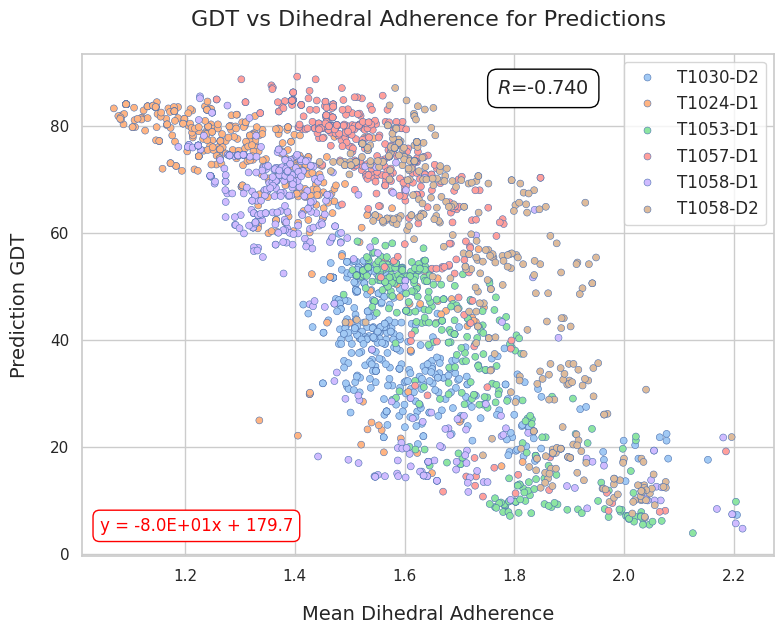

In [86]:
from scipy.stats import pearsonr
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(8, 6.5))
df = preds.dropna(subset=['da', 'GDT_TS']).reset_index(drop=True)

# df['zscore'] = (df['da'] - df['da'].mean()) / df['da'].std()
# df = df[df.zscore.abs() < 3]
df = df[~df.Model.str.contains('427')]
df['da'] = np.log10(df['da'])
# standerdize each protein_id
# for target in df['target'].unique():
#     mask = df['target'] == target
#     df.loc[mask, 'da'] = (df.loc[mask, 'da'] - df.loc[mask, 'da'].min()) / (df.loc[mask, 'da'].max() - df.loc[mask, 'da'].min())

# df = df[df.GDT_TS < 20]
regr = linregress(df.da, df.GDT_TS)
corr = pearsonr(df['da'], df['GDT_TS'])
print(regr.rvalue, corr)
print(f'Slope: {regr.slope}, Intercept: {regr.intercept}')
# sns.kdeplot(data=df, x='da', y='GDT_TS', ax=ax, fill=True, bw_method=0.1)
sns.scatterplot(data=df, x='da', y='GDT_TS', ax=ax, marker='o', s=25, edgecolor='b', legend=True, hue='target', palette='pastel')
# sns.regplot(data=df.reset_index(drop=True), x='da', y='GDT_TS', ax=ax, scatter=False, color='red')
# ax.plot(
#     np.linspace(0.8, 2.3, 100), 
#     regr.intercept + regr.slope * np.linspace(0.8, 2.3, 100), 
#     color='red', lw=2, label='Best Fit'
# )
# ax.set_xlabel(r'Log$_{10}$ Mean Dihedral Adherence', fontsize=14, labelpad=15)
ax.set_xlabel(r'Mean Dihedral Adherence', fontsize=14, labelpad=15)
ax.set_ylabel('Prediction GDT', fontsize=14, labelpad=15)
ax.set_title(r'GDT vs Dihedral Adherence for Predictions', fontsize=16, pad=20)
ax.text(0.6, 0.95, r'$R$='+f'{regr.rvalue:.3f}', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
if regr.intercept > 0:
    s = f'y = {regr.slope:.1E}x + {regr.intercept:.1f}'
else:
    s = f'y = {regr.slope:.1E}x - {-regr.intercept:.1f}'
ax.text(.025,.05, s, transform=ax.transAxes, fontsize=12, color='red',
        bbox=dict(boxstyle='round,pad=0.4', edgecolor='red', facecolor='white'))
# ax.set_xlim(1.05, 2.25)
# ax.set_ylim(-0.5, 93)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.savefig('gdt_vs_da.pdf')
plt.show()
sns.reset_defaults()